In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train=pd.read_csv('train.csv')
del train['id']

In [29]:
test=pd.read_csv('test.csv')
del test['id']

In [3]:
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [5]:
train.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

There are 3 categorical variables.

##Data Visualization

In [6]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

To check the quality of the dataset, lets see if any of the non-categorical columns have unreal values.

In [7]:
train.describe(percentiles=[0.25,0.5,0.75,0.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Driving License, Region_code, previously insured,policy sales channel are actually categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


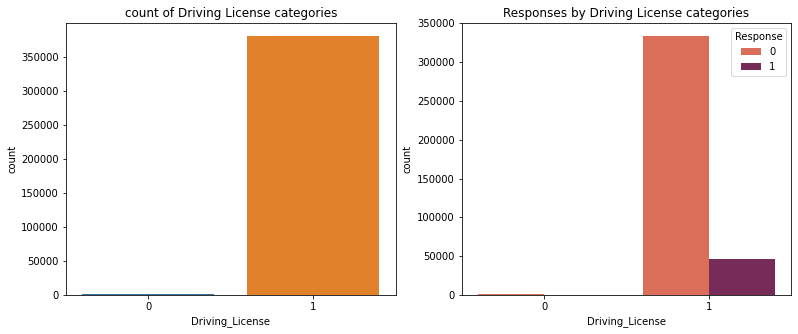

In [8]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])
plt.title("count of Driving License categories")
plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Driving License categories")
plt.show()

When plotting driving license by response, its clear that we don't have a lot of customers without a DL. This may or may not be a bad indicator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Region Representation in the data')

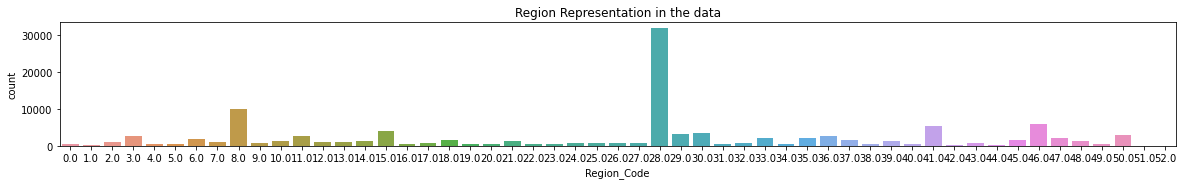

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(2,1,1)
sns.countplot(train['Region_Code'])
plt.title("Region Representation in the data")


We can see here that some regions are more dominantly represented in the training data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


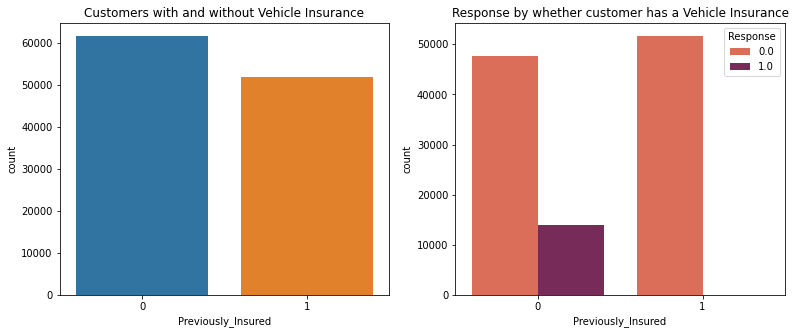

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])
plt.title("Customers with and without Vehicle Insurance")
plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue = train['Response'],palette="rocket_r")
plt.title("Response by whether customer has a Vehicle Insurance")
plt.show()

As expected, customers who already have vehicle insurance are not willing to buy another. This could be an important variable.

Age: max of 85 and min of 20 make sense. However, we should check if the age of people is random or is there a dominant age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Age distribution for customers who responded yes')

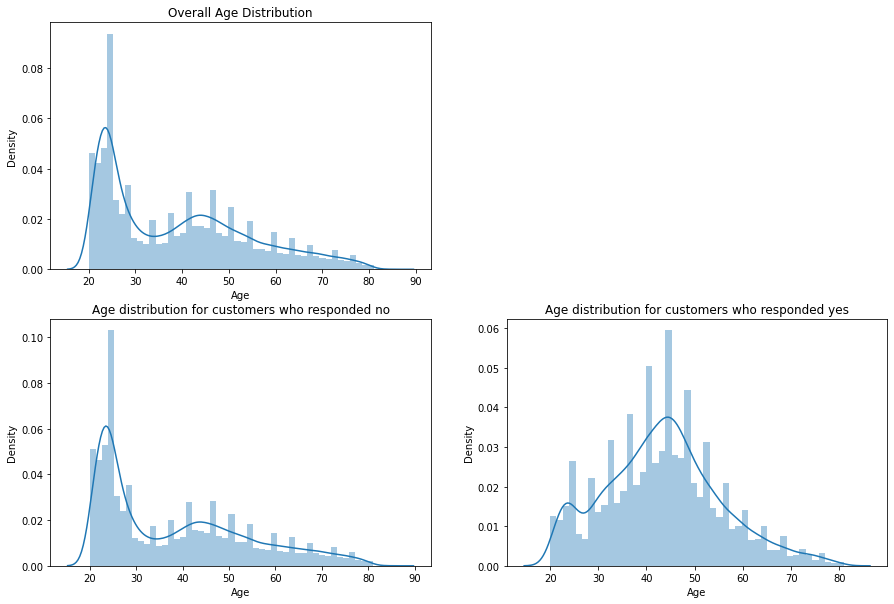

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Age'])
plt.title("Overall Age Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Age'])
plt.title("Age distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Age'])
plt.title("Age distribution for customers who responded yes")

We see there are more people in the age group of 20-30 than 40-50 in the overall training data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution for customers who responded yes')

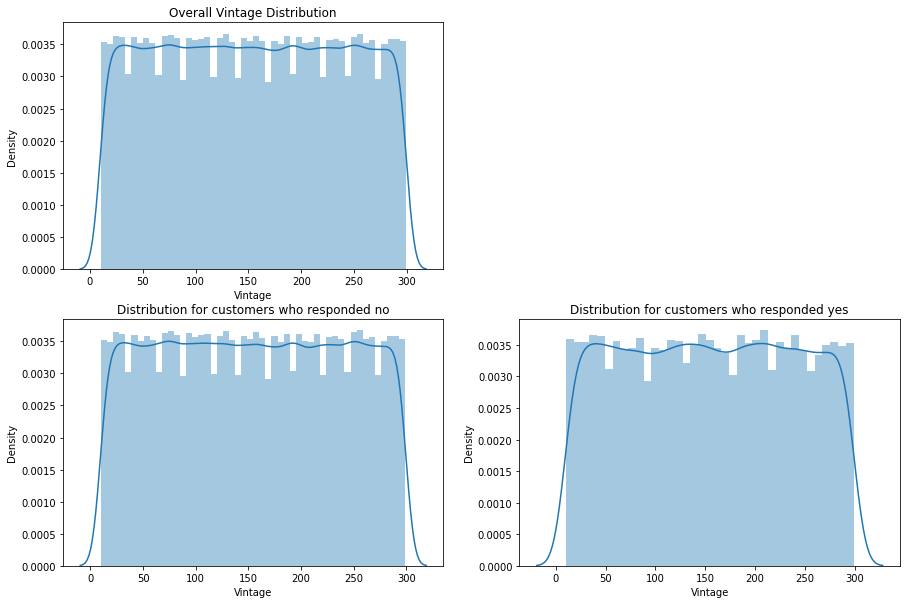

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Vintage'])
plt.title("Overall Vintage Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Vintage'])
plt.title("Distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Vintage'])
plt.title("Distribution for customers who responded yes")

Here, we see that the distribution for the variable Vintage does not change overall and for different response variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


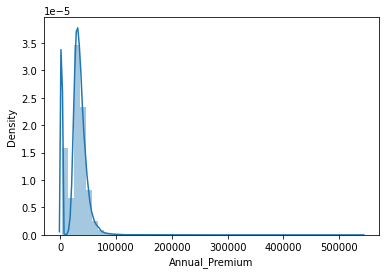

In [ ]:
sns.distplot(train['Annual_Premium'])

The above graph and the describe suggests that there are outliers in this variable. To remove variables, we can use the 1.5iqr rule.

##Data Preprocessing

In [9]:
##Scaling down Age
max_age=max(train.Age)
min_age=min(train.Age)
train.Age=train.Age.apply(lambda x: (x-min_age)/(max_age-min_age))
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,0.369231,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,0.861538,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,0.415385,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,0.015385,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,0.138462,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,0.830769,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,0.153846,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,0.015385,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,0.738462,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
#Sacling down Annual Premimum
max_premium=max(train.Annual_Premium)
min_premium=min(train.Annual_Premium)
train.Annual_Premium=train.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))

In [11]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [12]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
X = train.iloc[:,:10]
y = train.iloc[:,10]
category_cols=['Gender','Vehicle_Damage','Vehicle_Age']
for col in category_cols:
    le = preprocessing.LabelEncoder()
    X[col]=le.fit_transform(X[col])


In [21]:
print(X['Vehicle_Age'])

0         2
1         0
2         2
3         1
4         1
         ..
381104    0
381105    1
381106    1
381107    2
381108    0
Name: Vehicle_Age, Length: 381109, dtype: int64


#SMOTE

In [13]:
#Ref https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#Handling data imbalance using SMOTE:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_smote,y_smote=oversample.fit_resample(X,y)

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_smote,y_smote,test_size=.1,random_state=42)

#XGBClassifier

In [23]:
from xgboost import XGBClassifier
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
from sklearn.metrics import classification_report,auc,roc_curve
pred_train_y = classifier5.predict(test_x)
print('Classification report of test data \n',classification_report(test_y,pred_train_y))
##Good results

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83     33287
           1       0.80      0.94      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.86      0.85      0.85     66880
weighted avg       0.86      0.85      0.85     66880



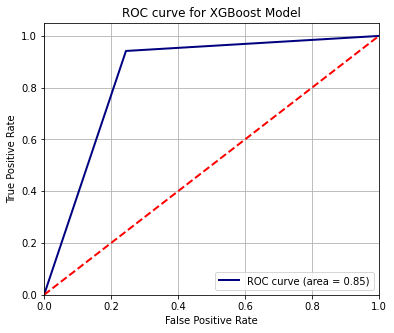

In [28]:
fpr, tpr, thresholds = roc_curve(test_y,pred_train_y)
roc_auc = auc(fpr, tpr)
fig=plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color= 'navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color= 'red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

In [31]:
pred_train_y

array([1, 1, 0, ..., 1, 1, 1])

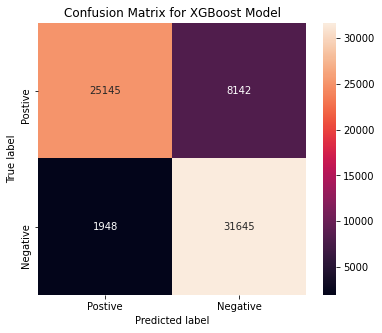

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
# Creates a confusion matrix
cm = confusion_matrix(test_y,pred_train_y) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Postive','Negative'], 
                     columns = ['Postive','Negative'])

fig = plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#RandomForestClassifier


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(criterion= 'entropy',
               max_depth= 6,
               min_samples_leaf= 6,
               min_samples_split= 7,
               n_estimators= 300,
                            class_weight='balanced')
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pred_train_y_clf= clf.predict(test_x)
print('Classification report of test data \n',classification_report(test_y,pred_train_y_clf))
##Good results

Classification report of test data 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     33287
           1       0.76      0.97      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.86      0.83      0.83     66880
weighted avg       0.86      0.83      0.83     66880



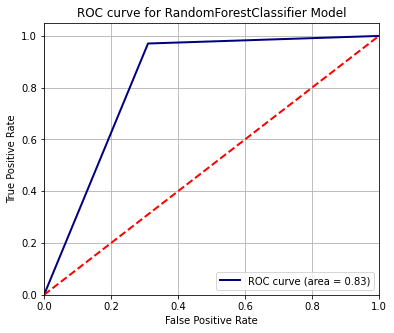

In [37]:
fpr, tpr, thresholds = roc_curve(test_y,pred_train_y_clf)
roc_auc = auc(fpr, tpr)
fig=plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color= 'navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color= 'red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC curve for RandomForestClassifier Model')
plt.legend(loc="lower right")
plt.show()

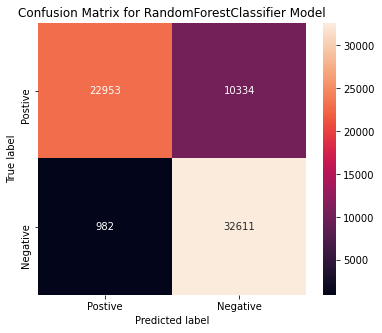

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
# Creates a confusion matrix
cm = confusion_matrix(test_y,pred_train_y_clf) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Postive','Negative'], 
                     columns = ['Postive','Negative'])

fig = plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix for RandomForestClassifier Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
#evaluate model 
from sklearn.metrics import classification_report,auc,roc_curve
def plot_feature_imp():
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.plot(kind='barh')


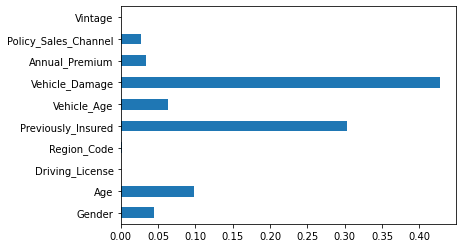

In [40]:
plot_feature_imp()